In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,learning_curve, cross_val_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.svm import SVR
import scipy.stats as stats
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import shap
from scipy.special import expit

In [2]:
df = pd.read_csv(r"C:\Users\Robyi\Documents\Data Science Dataset\vodka.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
x = df.drop(columns=['quality'])
y = df['quality']

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.35, random_state=42)

In [7]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr',SVR())
])

In [8]:
param_grid = {
    'svr__C': [0.01, 0.1, 1, 10, 100],
    'svr__degree' : [2,3,4],
    'svr__gamma' : ['scale','auto', 0.01,0.1,1 ],
    'svr__kernel' : ['linear', 'rbf','poly','sigmoid']
}

grid_search = HalvingGridSearchCV(pipeline,
param_grid=param_grid,
scoring='neg_mean_squared_error',
cv=5,
n_jobs=-1
)

grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

{'svr__C': 1, 'svr__degree': 4, 'svr__gamma': 'auto', 'svr__kernel': 'rbf'}


In [9]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)
print(y_pred)

[5.44546234 5.04106751 5.60339148 5.24883748 5.70524243 5.13016374
 4.94686315 4.84614574 5.81310239 5.7200114  6.20984332 5.06647971
 5.6520362  5.11542585 5.38990059 6.66023005 5.20897846 5.44509109
 6.85328129 4.92322605 4.89985344 5.24934241 5.67330323 6.37146964
 5.37377486 5.7181265  6.15642262 5.19995838 4.92857907 6.02692288
 5.16428278 5.0894421  5.88471591 4.89676079 5.64625122 5.0334383
 6.39808072 5.79833927 5.39327765 6.21733142 5.43973353 5.25223279
 6.11724932 5.08494027 6.08010634 5.89114383 6.46232014 5.67981718
 5.100222   5.52032322 4.89109947 5.21262947 5.74641996 7.04523996
 4.97244333 5.1246878  6.17968746 5.48592121 5.8752283  5.09982989
 5.62336426 5.98866977 5.14284903 5.17390467 6.49475115 5.09034115
 6.53492731 5.46294568 6.53748953 5.26281256 6.16538843 5.10029866
 5.85023328 5.72367802 6.27876141 5.07852926 6.61543865 5.64694691
 6.19294725 6.59613795 5.13184977 6.6670709  5.3155259  5.41196692
 6.11179479 6.47597528 5.05255228 6.10022785 6.51039417 4.94585

In [10]:
proba = expit(y_pred)
print(proba)

[0.9957027  0.99357471 0.99632819 0.99477383 0.99668257 0.9941192
 0.99294447 0.99220267 0.99702076 0.99673105 0.99799448 0.99373492
 0.99650192 0.99403241 0.99545829 0.99872079 0.99456247 0.99570111
 0.99894513 0.99277693 0.99260738 0.99477646 0.99657527 0.99829327
 0.9953848  0.9967249  0.99788466 0.99451347 0.99281522 0.9975929
 0.99431534 0.99387627 0.99722608 0.99258465 0.99648169 0.99352582
 0.99833802 0.99697658 0.99547354 0.99800941 0.99567812 0.99479146
 0.99780034 0.99384881 0.99771729 0.9972438  0.99844126 0.99659743
 0.99394154 0.99601142 0.99254287 0.99458218 0.99681597 0.99912921
 0.99312144 0.9940871  0.99793321 0.99587239 0.99719971 0.99393917
 0.99640054 0.99749927 0.99419289 0.99436947 0.99849093 0.99388174
 0.99855027 0.99577687 0.99855397 0.99484599 0.9979035  0.993942
 0.99712904 0.99674297 0.99812779 0.9938095  0.99866226 0.99648413
 0.99796037 0.99863623 0.99412905 0.9987295  0.99510934 0.99555698
 0.99778833 0.99846237 0.99364761 0.99776266 0.99851432 0.99293742

In [11]:
prediksi = pd.read_csv(r"C:\Users\Robyi\Documents\Data Science Dataset\vodkapredict.csv")
prediksi.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,8.6,0.38,0.36,3.0,0.081,30.0,119.0,0.9970,3.20,0.56,9.4
1,7.6,0.51,0.15,2.8,0.110,33.0,73.0,0.9955,3.17,0.63,10.2
2,7.7,0.62,0.04,3.8,0.084,25.0,45.0,0.9978,3.34,0.53,9.5
3,10.2,0.42,0.57,3.4,0.070,4.0,10.0,0.9971,3.04,0.63,9.6
4,7.5,0.63,0.12,5.1,0.111,50.0,110.0,0.9983,3.26,0.77,9.4


In [12]:
y_prediksi = best_model.predict(prediksi)
probabilitas_prediksi = expit(y_prediksi)
print(y_prediksi)
print(probabilitas_prediksi)

[5.09970464 5.42844683 5.09969916 5.41647414 4.89997927 5.37275595]
[0.99393842 0.99562928 0.99393839 0.99557687 0.99260831 0.99538012]


In [13]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

n = len(y_test)
p = x_test.shape[1]
r2_adj = 1 - ((1-r2) * (n - 1) / (n - p - 1))

print(mse)
print(mae)
print(rmse)
print(r2)
print(r2_adj)

0.38478896300765225
0.4710392691796015
0.6203136005341591
0.41152749103074404
0.399715086653624


In [14]:
cv_scores = cross_val_score(best_model, x_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [-0.62853943 -0.6963685  -0.6361766  -0.64458319 -0.55110732]
Mean CV Accuracy: -0.63135500984416


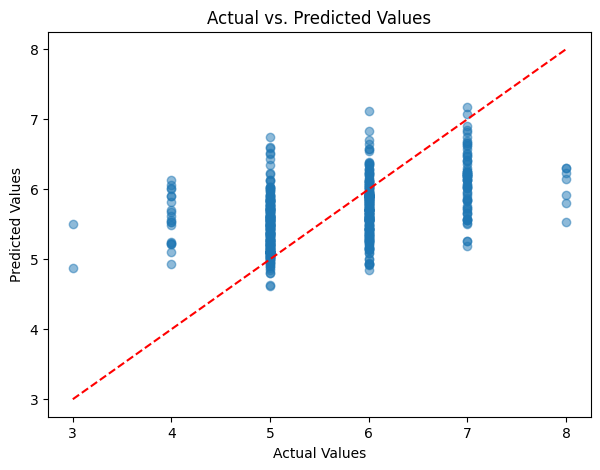

In [13]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

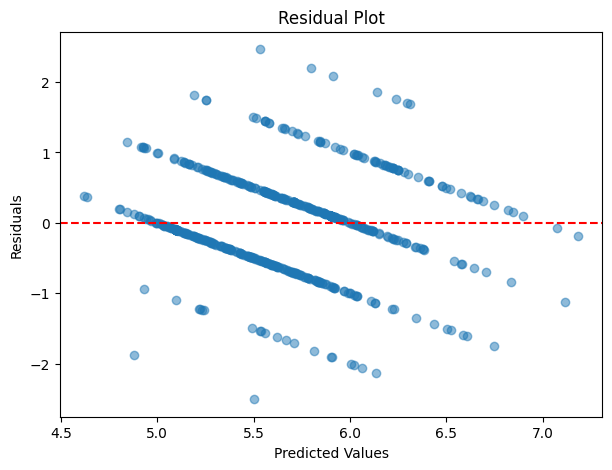

In [14]:
residuals = y_test - y_pred

plt.figure(figsize=(7, 5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

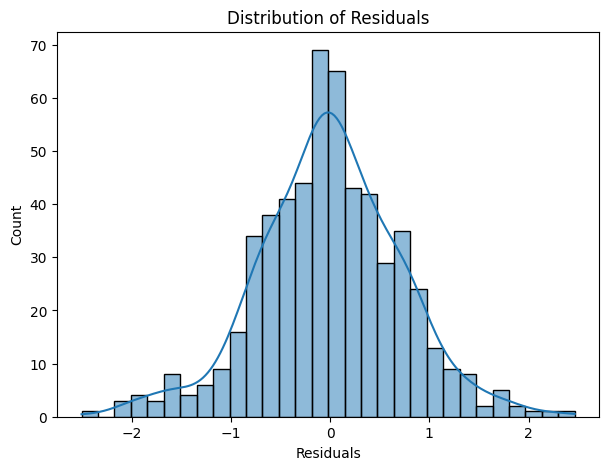

In [15]:
plt.figure(figsize=(7, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

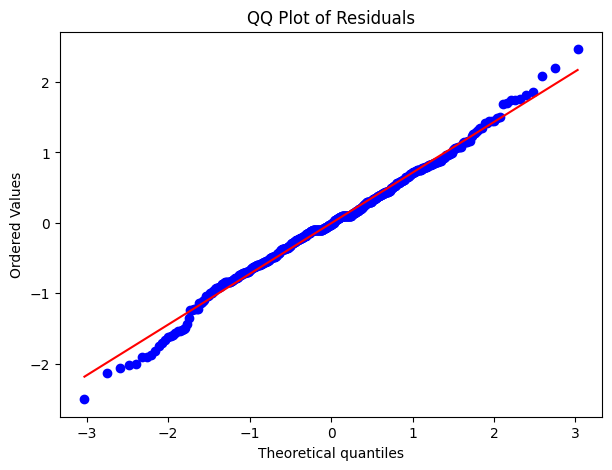

In [16]:
plt.figure(figsize=(7, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()

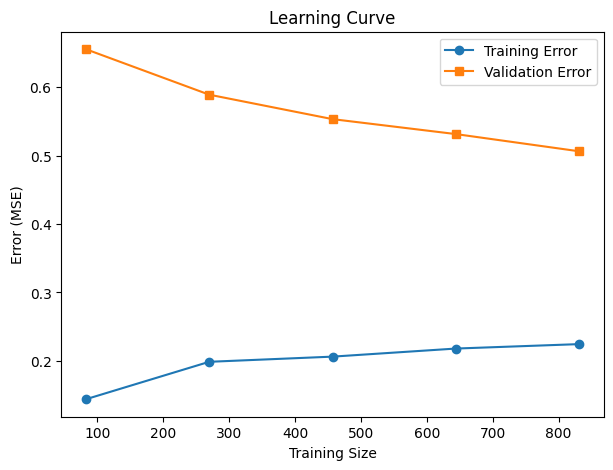

In [17]:
train_sizes, train_scores, test_scores = learning_curve(best_model, x_train, y_train, cv=5, scoring="neg_mean_squared_error")

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(7, 5))
plt.plot(train_sizes, train_mean, label="Training Error", marker="o")
plt.plot(train_sizes, test_mean, label="Validation Error", marker="s")
plt.xlabel("Training Size")
plt.ylabel("Error (MSE)")
plt.legend()
plt.title("Learning Curve")
plt.show()

In [ ]:
perm_importance = permutation_importance(best_model, x_test, y_test, scoring="neg_mean_squared_error")
feature_importance = perm_importance.importances_mean

feature_names = x_train.columns

plt.figure(figsize=(6, 4))
sns.barplot(x=feature_importance, y=feature_names, orient="h", palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.tight_layout()

In [ ]:
explainer = shap.Explainer(best_model.predict, x_train)
shap_values = explainer(x_test)

In [ ]:
shap.summary_plot(shap_values, x_test, feature_names=x_train.columns)
shap.plots.bar(shap_values)